In [435]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [436]:
store=pd.read_csv("sensor10.csv")
df=store
df

,Unnamed: 0,time,co2,no2,o3,so2
0,0,1.451587e+09,601.093214,7.370765,0.268705,1.281843
1,1,1.451601e+09,282.062362,6.909870,0.177553,0.846893
2,2,1.451615e+09,530.027300,3.107245,0.346335,2.689518
3,3,1.451630e+09,619.930083,7.263156,0.262786,4.315883
4,4,1.451644e+09,318.112997,6.419144,0.382877,3.644856
5,5,1.451659e+09,628.045066,5.467754,0.343998,3.121340
6,6,1.451673e+09,541.040058,6.038795,0.272611,1.264424
7,7,1.451687e+09,439.985418,6.444876,0.193433,0.830760
8,8,1.451702e+09,592.894343,5.816616,0.381963,2.648374
9,9,1.451716e+09,480.458306,3.091185,0.179080,4.363246


In [437]:
df['day']=(df['time']-1451586600)/14400/6
df['day']=df['day'].astype(int)
df["months"]=df["day"]/31
df["months"]=df["months"].astype(int)
df['year']=df["day"]/365
df['year']=df['year'].astype(int)
df=df.iloc[:,2:]
df.shape


(2190, 7)

In [438]:
days=df.groupby(['day']).max()
days["day"]=np.arange(1,366)

days1=df.groupby(['day']).max()
days1["day"]=np.arange(1,366)

days2=df.groupby(['day']).mean()
days2["day"]=np.arange(1,366)

result = pd.concat([days1, days2], axis=1)
result

,co2,no2,o3,so2,months,year,day,co2,no2,o3,so2,months,year,day
day,,,,,,,,,,,,,,
0,628.045066,7.370765,0.382877,4.315883,0,0,1,496.545170,6.089656,0.297042,2.650055,0,0,1
1,592.894343,6.862463,0.381963,4.363246,0,0,2,493.860011,5.778451,0.279469,2.648217,0,0,2
2,638.859750,7.262311,0.369240,4.513666,0,0,3,503.375330,6.300810,0.285804,2.689077,0,0,3
3,605.583212,6.639973,0.341298,4.330464,0,0,4,426.194653,5.916108,0.214275,2.656856,0,0,4
4,618.035179,7.593110,0.343214,4.326957,0,0,5,460.534212,5.553822,0.258536,2.648365,0,0,5
5,549.609371,6.554907,0.386502,4.415669,0,0,6,403.449706,4.740390,0.333402,2.661187,0,0,6
6,645.127546,6.134793,0.370813,4.483383,0,0,7,429.147996,4.993140,0.266004,2.672057,0,0,7
7,629.680297,7.681733,0.353821,4.415772,0,0,8,434.115361,5.907573,0.264432,2.677447,0,0,8
8,627.803953,6.881827,0.369918,4.408578,0,0,9,382.270485,5.277398,0.256954,2.671164,0,0,9


In [439]:


df['day'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [440]:
months=days.groupby(["months"]).mean()
months["months"]=np.arange(1,13)
months.drop('day', axis=1, inplace=True)
months["year"]=months["year"].astype(int)
months


,co2,no2,o3,so2,year,months
months,,,,,,
0,579.581422,7.021603,0.361019,4.722525,0,1
1,601.039338,7.207042,0.349279,4.957564,0,2
2,603.464302,7.039205,0.352492,5.035500,0,3
3,588.360973,7.241735,0.359411,4.980337,0,4
4,593.109426,7.155092,0.358299,5.151397,0,5
5,596.131785,7.108058,0.352596,5.408952,0,6
6,586.750643,6.951736,0.355699,5.484092,0,7
7,587.255832,7.208798,0.359365,5.625270,0,8
8,580.029578,7.185054,0.353725,5.624328,0,9


In [441]:
year=months.groupby(["year"]).mean()
year["year"]=1
year.drop(['months'],axis=1,inplace=True)
year

,co2,no2,o3,so2,year
year,,,,,
0,593.051912,7.10985,0.356687,5.423866,1


In [442]:
days

,co2,no2,o3,so2,months,year,day
day,,,,,,,
0,628.045066,7.370765,0.382877,4.315883,0,0,1
1,592.894343,6.862463,0.381963,4.363246,0,0,2
2,638.859750,7.262311,0.369240,4.513666,0,0,3
3,605.583212,6.639973,0.341298,4.330464,0,0,4
4,618.035179,7.593110,0.343214,4.326957,0,0,5
5,549.609371,6.554907,0.386502,4.415669,0,0,6
6,645.127546,6.134793,0.370813,4.483383,0,0,7
7,629.680297,7.681733,0.353821,4.415772,0,0,8
8,627.803953,6.881827,0.369918,4.408578,0,0,9


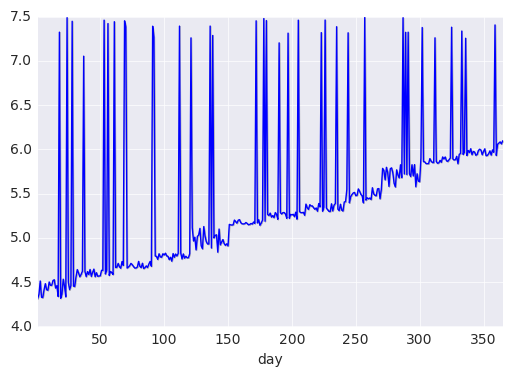

In [443]:
sns.set_style("darkgrid")
#sns.tsplot(temp2, temp1)
sns.tsplot(days["so2"], temp1)
# sns.tsplot(days["co2"], temp1)
# sns.tsplot(days["o3"], temp1)
plt.show()

In [444]:
temp1=days["day"]
temp2=days["no2"]

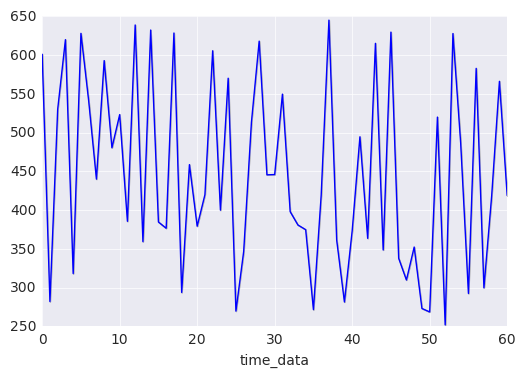

In [445]:
store["time_data"] = ((store["time"]-1451586600)/14400)
temp1=store.loc[:60,"co2"]
temp2=store.loc[:60,"time_data"]
sns.tsplot(temp1, temp2)
plt.show()
#store

In [446]:
days.describe()


,co2,no2,o3,so2,months,year,day
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.0,365.000000
mean,592.915993,7.109545,0.356613,5.411925,5.394521,0.0,183.000000
std,50.341000,0.594101,0.030326,0.794270,3.403775,0.0,105.510663
min,380.204976,4.602372,0.234510,4.315883,0.000000,0.0,1.000000
25%,568.499276,6.795248,0.341538,4.785954,2.000000,0.0,92.000000
50%,606.456720,7.268844,0.367505,5.286078,5.000000,0.0,183.000000
75%,631.566561,7.590836,0.380314,5.838665,8.000000,0.0,274.000000
max,649.897029,7.793406,0.389869,7.488128,11.000000,0.0,365.000000
